In [ ]:
import os
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read image & convert to grayscale

Downloaded the LFW Dataset :

LFW - images aligned with deep funneling : http://vis-www.cs.umass.edu/lfw/

Dataset Structure :

datset\
    
    label_name_A\
        label_name_A_001.jpg
        label_name_A_002.jpg
        label_name_A_003.jpg
        .
        .
    label_name_B\
        label_name_B_001.jpg
        label_name_B_002.jpg
        label_name_B_003.jpg
        .
        .

Image Selection from The Data set

In [ ]:
def detect_face(img):
    img = img[70:195, 78:172]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [ ]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [ ]:
dataset_folder = "/content/drive/MyDrive/Colab Notebooks/data/Data1/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:]
    if len(files) < 5:
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img)
            if img is not None :
                images.append(img)
                names.append(folder)

                print_progress(i, len(files), folder)


[####################] (182 samples)	 label : 6.Fabian 		
[####################] (444 samples)	 label : 7.Jinaro 		
[####################] (393 samples)	 label : 8.Kembo 		
[####################] (451 samples)	 label : 5.Danson 		
[####################] (579 samples)	 label : 9.Kezziah 		

[####################] (623 samples)	 label : 11.Medrine 		
[####################] (309 samples)	 label : 14.Steph 		

[####################] (437 samples)	 label : 10.Madiba 		
[################### ] (37 samples)	 label : 2.Andrew 		
[####################] (396 samples)	 label : 15.Terer 		
[####################] (502 samples)	 label : 1.Alvin 		
[####################] (346 samples)	 label : 3.Bill 		
[####################] (395 samples)	 label : 4.Celestine 		


In [ ]:
print("number of samples :", len(names))

number of samples : 6222


Image Augementation

In [ ]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])
    
    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30)) 
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))
    
    return imgs

Test augmentation result

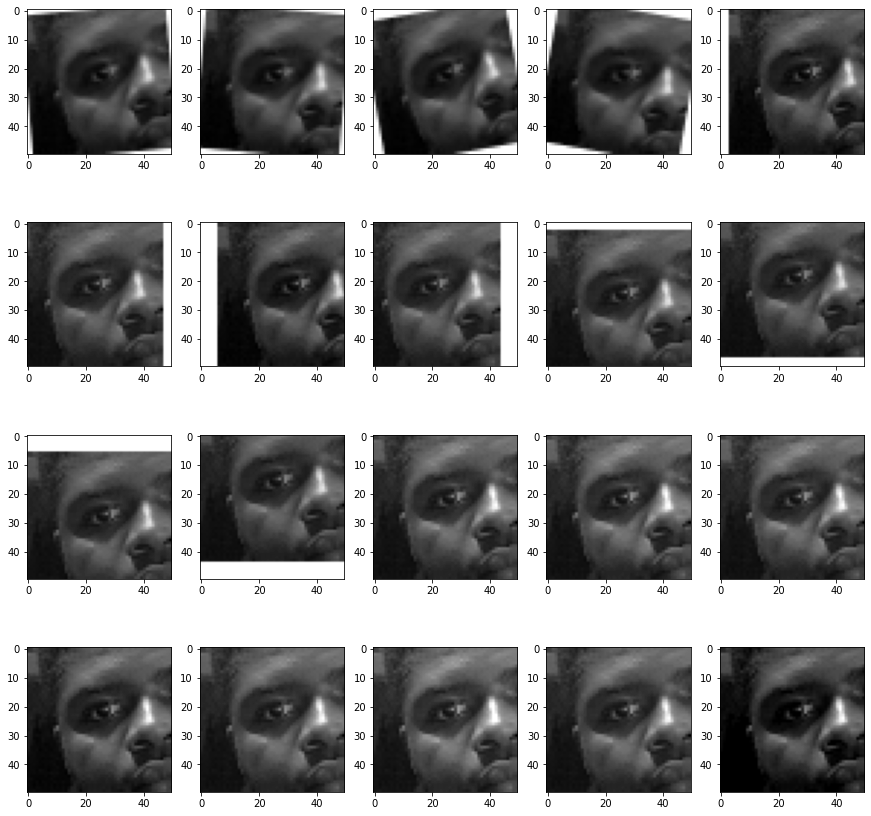

In [ ]:
img_test = images[100]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,15))
for i, img in enumerate(augmented_image_test):
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

Applying augmentation to all images

In [ ]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

Total number of augmented images

In [ ]:
len(augmented_images), len(augmented_names)

(124440, 124440)

In [ ]:
images.extend(augmented_images)
names.extend(augmented_names)

Total  number of images augmentated together with the original images

In [ ]:
len(images), len(names)

(130662, 130662)

In [ ]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('1.Alvin', 10542)
('1.Shannon Simiyu', 10437)
('10.Madiba', 9177)
('11.Medrine', 13083)
('12.Samuel', 5292)
('13.Situne', 7959)
('14.Steph', 6489)
('15.Terer', 8316)
('2.Andrew', 777)
('3.Bill', 7266)
('4.Celestine', 8295)
('5.Danson', 9471)
('6.Fabian', 3822)
('7.Jinaro', 9324)
('8.Kembo', 8253)
('9.Kezziah', 12159)



```

 Balancing Data

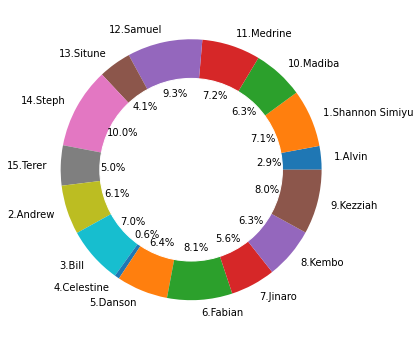

In [ ]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(12,6))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, labels=label_name, autopct='%1.1f%%')
    plt.gcf().gca().add_artist(my_circle)
    plt.show()
    
unique = np.unique(names)
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

In [ ]:
# reduce sample size per-class using numpy random choice
n = 1000

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=True)

mask = np.hstack([randc(names, l) for l in np.unique(names)])

In [ ]:
names = [names[m] for m in mask]
images = [images[m] for m in mask]

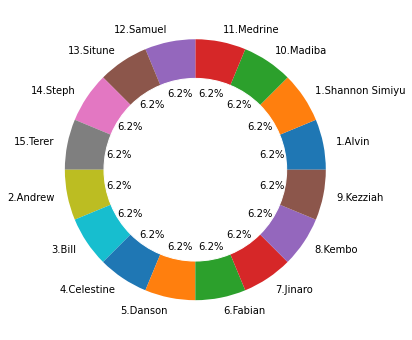

In [ ]:
label_distr = {i:names.count(i) for i in names}.values()
print_data(label_distr, unique)

Encoding Labels 

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils.np_utils import to_categorical

In [ ]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [ ]:
print("number of class :", len(labels))
print(labels)


number of class : 12
['1.Alvin' '1.Shannon Simiyu' '10.Madiba' '11.Medrine' '12.Samuel'
 '14.Steph' '3.Bill' '4.Celestine' '5.Danson' '6.Fabian' '8.Kembo'
 '9.Kezziah']


In [ ]:
print(name_vec)

[ 0  0  0 ... 11 11 11]


In [ ]:
print(categorical_name_vec)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


 Split Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32),   # input data
                                                    np.array(categorical_name_vec),       # target/output data 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(10200, 50, 50) (10200, 12) (1800, 50, 50) (1800, 12)


Reshape Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
x_train.shape, x_test.shape

((10200, 50, 50, 1), (1800, 50, 50, 1))

 Create CNN Model

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

In [ ]:
def cnn_model(input_shape):  
    model = Sequential()
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))  # equal to number of classes
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

Training the CNN Model

In [ ]:
input_shape = x_train[0].shape

EPOCHS = 10
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_split=0.15   # 15% of train dataset will be used as validation set
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                    

Model evaluation

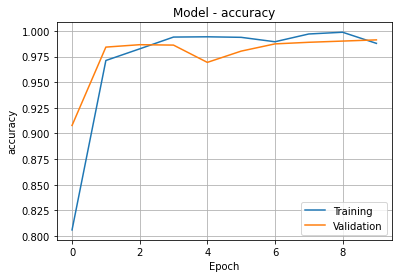

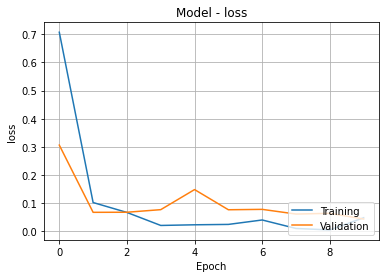

In [ ]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/model-cnn-facerecognition10.h5")

In [ ]:
# predict test data
y_pred=model.predict(x_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(12,7))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

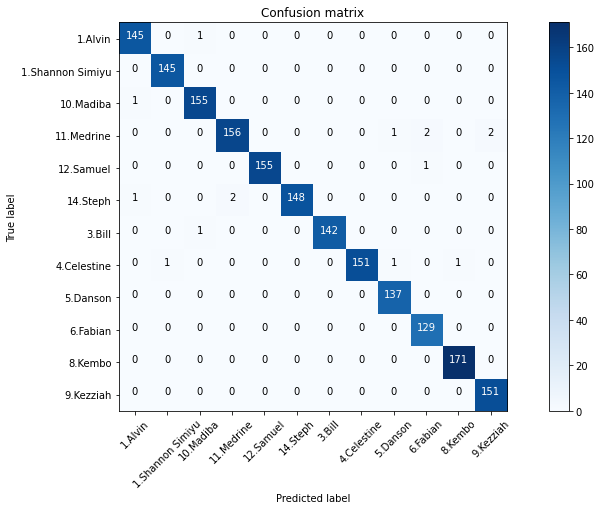

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix')

In [ ]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=labels))

                  precision    recall  f1-score   support

         1.Alvin       0.99      0.99      0.99       146
1.Shannon Simiyu       0.99      1.00      1.00       145
       10.Madiba       0.99      0.99      0.99       156
      11.Medrine       0.99      0.97      0.98       161
       12.Samuel       1.00      0.99      1.00       156
        14.Steph       1.00      0.98      0.99       151
          3.Bill       1.00      0.99      1.00       143
     4.Celestine       1.00      0.98      0.99       154
        5.Danson       0.99      1.00      0.99       137
        6.Fabian       0.98      1.00      0.99       129
         8.Kembo       0.99      1.00      1.00       171
       9.Kezziah       0.99      1.00      0.99       151

        accuracy                           0.99      1800
       macro avg       0.99      0.99      0.99      1800
    weighted avg       0.99      0.99      0.99      1800

